# Analysis of FAERS 2019 Data for Drug effects comparison and finding better Drugs.

In [16]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
demo_q1= pd.read_csv('faers_ascii_2019q1/ascii/DEMO19Q1.txt',sep='$',encoding='latin-1')
demo_q2= pd.read_csv('faers_ascii_2019q2/ascii/DEMO19Q2.txt',sep='$',encoding='latin-1')
demo_q3= pd.read_csv('faers_ascii_2019q3/ascii/DEMO19Q3.txt',sep='$',encoding='latin-1')
demo_q4= pd.read_csv('faers_ascii_2019q4/ascii/DEMO19Q4.txt',sep='$',encoding='latin-1')
drug_q1= pd.read_csv('faers_ascii_2019q1/ascii/DRUG19Q1.txt',sep='$',encoding='latin-1')
drug_q2= pd.read_csv('faers_ascii_2019q2/ascii/DRUG19Q2.txt',sep='$',encoding='latin-1')
drug_q3= pd.read_csv('faers_ascii_2019q3/ascii/DRUG19Q3.txt',sep='$',encoding='latin-1')
drug_q4= pd.read_csv('faers_ascii_2019q4/ascii/DRUG19Q4.txt',sep='$',encoding='latin-1')
reac_q1= pd.read_csv('faers_ascii_2019q1/ascii/REAC19Q1.txt',sep='$',encoding='latin-1')
reac_q2= pd.read_csv('faers_ascii_2019q2/ascii/REAC19Q2.txt',sep='$',encoding='latin-1')
reac_q3= pd.read_csv('faers_ascii_2019q3/ascii/REAC19Q3.txt',sep='$',encoding='latin-1')
reac_q4= pd.read_csv('faers_ascii_2019q4/ascii/REAC19Q4.txt',sep='$',encoding='latin-1')
outc_q1= pd.read_csv('faers_ascii_2019q1/ascii/OUTC19Q1.txt',sep='$',encoding='latin-1')
outc_q2= pd.read_csv('faers_ascii_2019q2/ascii/OUTC19Q2.txt',sep='$',encoding='latin-1')
outc_q3= pd.read_csv('faers_ascii_2019q3/ascii/OUTC19Q3.txt',sep='$',encoding='latin-1')
outc_q4= pd.read_csv('faers_ascii_2019q4/ascii/OUTC19Q4.txt',sep='$',encoding='latin-1')
rpsr_q1= pd.read_csv('faers_ascii_2019q1/ascii/RPSR19Q1.txt',sep='$',encoding='latin-1')
rpsr_q2= pd.read_csv('faers_ascii_2019q2/ascii/RPSR19Q2.txt',sep='$',encoding='latin-1')
rpsr_q3= pd.read_csv('faers_ascii_2019q3/ascii/RPSR19Q3.txt',sep='$',encoding='latin-1')
rpsr_q4= pd.read_csv('faers_ascii_2019q4/ascii/RPSR19Q4.txt',sep='$',encoding='latin-1')
indi_q1= pd.read_csv('faers_ascii_2019q1/ascii/INDI19Q1.txt',sep='$',encoding='latin-1')
indi_q2= pd.read_csv('faers_ascii_2019q2/ascii/INDI19Q2.txt',sep='$',encoding='latin-1')
indi_q3= pd.read_csv('faers_ascii_2019q3/ascii/INDI19Q3.txt',sep='$',encoding='latin-1')
indi_q4= pd.read_csv('faers_ascii_2019q4/ascii/INDI19Q4.txt',sep='$',encoding='latin-1')

/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_66204/4220548788.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_q1= pd.read_csv('faers_ascii_2019q1/ascii/DEMO19Q1.txt',sep='$',encoding='latin-1')
/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_66204/4220548788.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_q2= pd.read_csv('faers_ascii_2019q2/ascii/DEMO19Q2.txt',sep='$',encoding='latin-1')
/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_66204/4220548788.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_q3= pd.read_csv('faers_ascii_2019q3/ascii/DEMO19Q3.txt',sep='$',encoding='latin-1')
/var/folders/xg/g1wspk597n71rp310cb20lbh0000gn/T/ipykernel_66204/4220548788.py:4: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=Fa

In [18]:
demo= pd.concat([demo_q1,demo_q2,demo_q3,demo_q4],ignore_index=True)
drug= pd.concat([drug_q1,drug_q2,drug_q3,drug_q4],ignore_index=True)
reac= pd.concat([reac_q1,reac_q2,reac_q3,reac_q4],ignore_index=True)
outc= pd.concat([outc_q1,outc_q2,outc_q3,outc_q4],ignore_index=True)
rpsr= pd.concat([rpsr_q1,rpsr_q2,rpsr_q3,rpsr_q4],ignore_index=True)
indi= pd.concat([indi_q1,indi_q2,indi_q3,indi_q4],ignore_index=True)

### Q1- 10 most common adverse effects 

<BarContainer object of 10 artists>

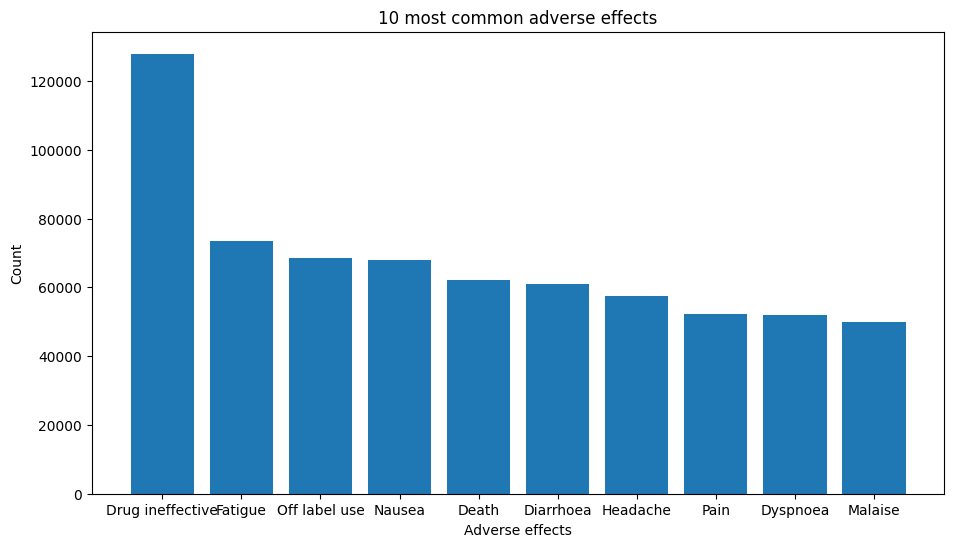

In [5]:
plt.figure(figsize=(11,6))
plt.title('10 most common adverse effects')
plt.xlabel('Adverse effects')
plt.ylabel('Count')
plt.bar(reac.groupby('pt')['pt'].count().sort_values(ascending=False).head(10).index,reac.groupby('pt')['pt'].count().sort_values(ascending=False).head(10).values)

In [19]:
#tramal to another medication called lyrica and the adverse effects of tramal
new_df= pd.merge(drug,reac,on=['primaryid','caseid'],how='inner')
top_10_effects_tramal= new_df[new_df['drugname']=='tramal'].groupby('pt')['pt'].count().sort_values(ascending=False)
top_10_effects_lyrica= new_df[new_df['drugname']=='LYRICA'].groupby('pt')['pt'].count().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 adverse effects of lyrica')

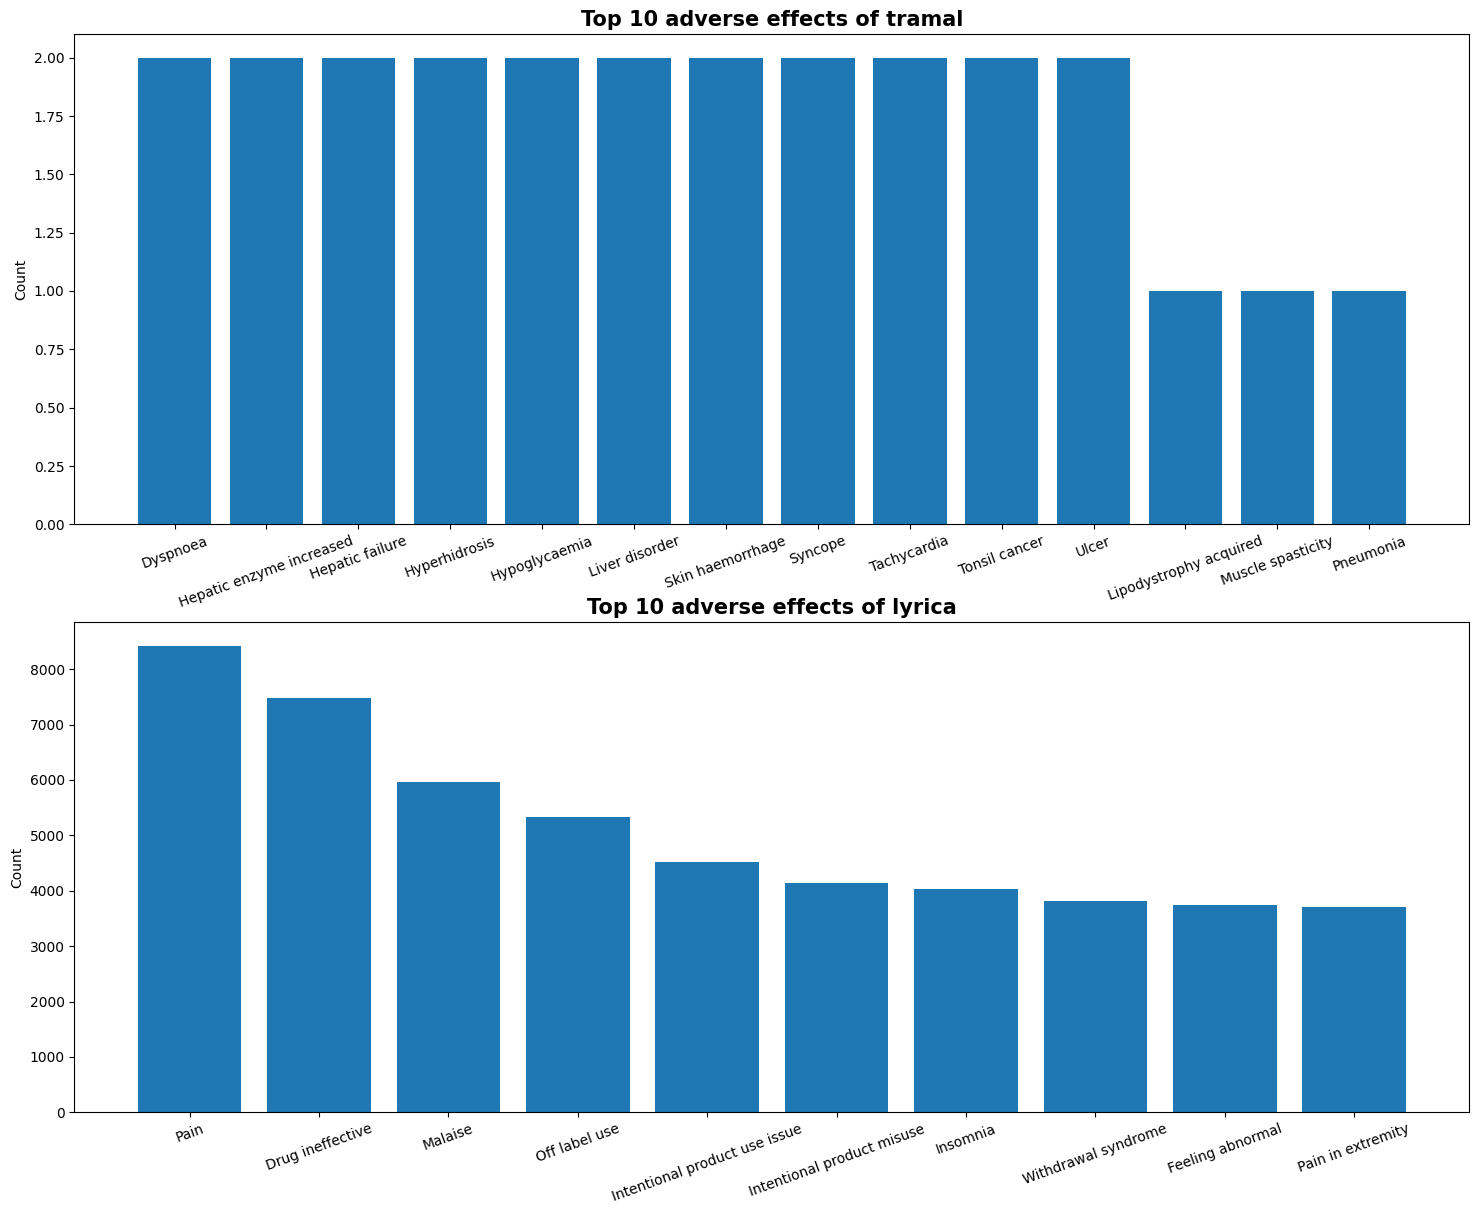

In [7]:
#two horizonal bar charts suplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,14))
ax1= plt.subplot(2,1,1)
plt.bar(top_10_effects_tramal.index,top_10_effects_tramal.values)
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.title('Top 10 adverse effects of tramal',fontdict={'weight':'bold','size':15})
ax2= plt.subplot(2,1,2)
plt.bar(top_10_effects_lyrica.index,top_10_effects_lyrica.values)
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.title('Top 10 adverse effects of lyrica',fontdict={'weight':'bold','size':15})

### Ans-  Lyrica is better than Tramal

In [12]:
drug.head()

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,1000661812,10006618,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,20702.0,NaN,NaN,FILM-COATED TABLET,NaN
1,1000661812,10006618,2,SS,BENTYL,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000661812,10006618,3,SS,DICYCLOMINE,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000808590,10008085,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,20.0,MG,NaN,QOW
4,1000808590,10008085,2,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG, QMO",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,30.0,MG,NaN,/month


In [22]:
#merging the drug and reac dataframes
drug_reac= pd.merge(drug,reac,on=['primaryid','caseid'],how='inner')

In [27]:
drug_reac.drop(columns=['drug_seq', 'role_cod', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq','drug_rec_act'],inplace=True)    

In [28]:
drug_group= drug_reac.groupby(['drugname','caseid'])['pt'].count().reset_index()

In [29]:
indi_group= indi.groupby('caseid').agg({'indi_pt':lambda x: x.tolist()}).reset_index()

In [30]:
drug_indi_group= pd.merge(drug_group,indi_group,on='caseid',how='inner')

In [74]:
#reduce repeation in list inside indi_pt
drug_indi_group['indi_pt']=drug_indi_group['indi_pt'].apply(lambda x: list(set(x)))

### Q2 - Comparing Drugs for Indication

In [ ]:
def best_drug_for(indicated):
    df_result = pd.DataFrame(columns=['disease', 'drugname', 'least_pt'])
    for i, row in drug_indi_group.iterrows():
        indi_pt_list = row['indi_pt']
        drugname = row['drugname']
        pt = row['pt']
        if any(indicated.lower() in indi.lower() for indi in indi_pt_list):
            if not df_result.empty:
                current_least_pts = df_result.loc[df_result['disease'] == indicated, 'least_pt'].values
                if len(current_least_pts) < 3:
                    df_result = df_result.append({'disease': indicated, 'drugname': drugname, 'least_pt': pt}, ignore_index=True)
                else:
                    max_least_pt = max(current_least_pts)
                    if pt < max_least_pt:
                        max_indices = df_result.loc[(df_result['disease'] == indicated) & (df_result['least_pt'] == max_least_pt)].index
                        for index in max_indices:
                            df_result.at[index, ['drugname', 'least_pt']] = [drugname, pt]
            else:
                df_result = df_result.append({'disease': indicated, 'drugname': drugname, 'least_pt': pt}, ignore_index=True)
    return df_result


### Q2- Best drug for any indicated pt in incremental order of affects.

In [87]:
def best_drug_for(indicated):
    df_result = pd.DataFrame(columns=['disease', 'drugname', 'least_pt'])
    drugnames = []
    
    for i, row in drug_indi_group.iterrows():
        indi_pt_list = row['indi_pt']
        drugname = row['drugname']
        pt = row['pt']
        
        if any(indicated.lower() in indi.lower() for indi in indi_pt_list):
            drugnames.append((drugname, pt))
    
    if drugnames:
        drugnames = sorted(drugnames, key=lambda x: x[1])
        
        df_result = pd.concat([df_result, pd.DataFrame({'disease': indicated, 'drugname': [name for name, _ in drugnames], 'least_pt': [pt for _, pt in drugnames]})], ignore_index=True)
    
    return df_result


In [ ]:
best_drug_for('anxiety')

,disease,drugname,least_pt
0,anxiety,.25 MG ALPRAZOLAM,1
1,anxiety,3M CAVILON ANTIFUNGAL,1
2,anxiety,BEVACIZUMAB.,1
3,anxiety,BLINDED ATEZOLIZUMAB,1
4,anxiety,BUSPIRONE,1
...,...,...,...
131317,anxiety,JAKAVI,1966
131318,anxiety,DILANTIN,2274
131319,anxiety,XOLAIR,4850
131320,anxiety,NEXIUM,5824


## Analysing XML data

In [89]:
q1_first_df = pd.read_xml('faers_xml_2019Q1/xml/1_ADR19Q1.xml')
q1_second_df = pd.read_xml('faers_xml_2019Q1/xml/2_ADR19Q1.xml')
q1_third_df = pd.read_xml('faers_xml_2019Q1/xml/3_ADR19Q1.xml')
q2_first_df = pd.read_xml('faers_xml_2019Q2/xml/1_ADR19Q2.xml')
q2_second_df = pd.read_xml('faers_xml_2019Q2/xml/2_ADR19Q2.xml')
q2_third_df = pd.read_xml('faers_xml_2019Q2/xml/3_ADR19Q2.xml')
q3_first_df = pd.read_xml('faers_xml_2019Q3/xml/1_ADR19Q3.xml')
q3_second_df = pd.read_xml('faers_xml_2019Q3/xml/2_ADR19Q3.xml')
q3_third_df = pd.read_xml('faers_xml_2019Q3/xml/3_ADR19Q3.xml')
q4_first_df = pd.read_xml('faers_xml_2019Q4/xml/1_ADR19Q4.xml')
q4_second_df = pd.read_xml('faers_xml_2019Q4/xml/2_ADR19Q4.xml')
q4_third_df = pd.read_xml('faers_xml_2019Q4/xml/3_ADR19Q4.xml')

In [90]:
whole_set=[q1_first_df,q1_second_df,q1_third_df,q2_first_df,q2_second_df,q2_third_df,
           q3_first_df,q3_second_df,q3_third_df,q4_first_df,q4_second_df,q4_third_df]
    

In [91]:
#extracting the relevant columns
def filter_data(df):
    clean_df= df.drop(columns=['messagetype', 'messageformatversion', 'messageformatrelease',
       'messagenumb', 'messagesenderidentifier', 'messagereceiveridentifier',
       'messagedateformat', 'messagedate','safetyreportversion', 'safetyreportid', 'safetyreportid',
       'transmissiondateformat', 'receiptdateformat', 'receivedateformat','duplicate','reportduplicate',
       'authoritynumb','primarysource','sender','receiver','patient'],inplace=True)
    return clean_df

In [92]:
for df in whole_set:
    filter_data(df)

In [93]:
#merging the dataframes
combined_df= pd.concat(whole_set,ignore_index=True)

In [94]:
#dropping the duplicates and null values
combined_df.dropna(axis=0,how='all',inplace=True)
combined_df.drop_duplicates(inplace=True)
combined_df.fillna(0,inplace=True)

In [95]:
#convertint the data types
combined_df['transmissiondate']=pd.to_datetime(combined_df['transmissiondate'],format='%Y%m%d')
combined_df['receiptdate']=pd.to_datetime(combined_df['receiptdate'],format='%Y%m%d')
combined_df['receivedate']=pd.to_datetime(combined_df['receivedate'],format='%Y%m%d')
combined_df['serious']=combined_df['serious'].map({1:1,2:0})

In [96]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629958 entries, 1 to 1727307
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   primarysourcecountry          1629958 non-null  object        
 1   occurcountry                  1629958 non-null  object        
 2   transmissiondate              1629958 non-null  datetime64[ns]
 3   reporttype                    1629958 non-null  float64       
 4   serious                       1629958 non-null  int64         
 5   seriousnesshospitalization    1629958 non-null  float64       
 6   receivedate                   1629958 non-null  datetime64[ns]
 7   receiptdate                   1629958 non-null  datetime64[ns]
 8   fulfillexpeditecriteria       1629958 non-null  float64       
 9   companynumb                   1629958 non-null  object        
 10  seriousnessother              1629958 non-null  float64       
 11  ser

## Number of Expedited Vs Non- Expedited

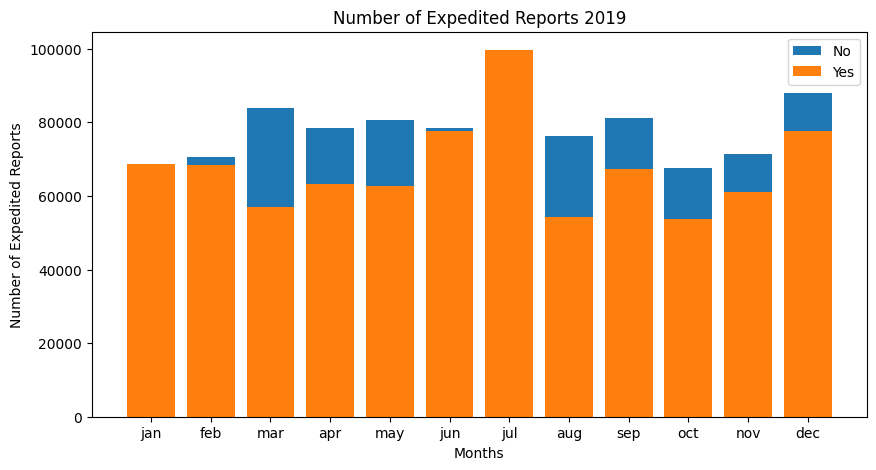

In [97]:
combined_df['fulfillexpeditecriteria'].value_counts()
X=[]
Y=[]
for i in whole_set:
    X.append(i['fulfillexpeditecriteria'].value_counts()[1])
    Y.append(i['fulfillexpeditecriteria'].value_counts()[2])
    
Z=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

plt.figure(figsize=(10,5))
plt.title('Number of Expedited Reports 2019')
plt.bar(Z,X,label='No')
plt.bar(Z,Y,label='Yes')
plt.xlabel('Months')
plt.ylabel('Number of Expedited Reports')
plt.legend()
